In [261]:
import os
for dirname, _, filenames in os.walk('C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project2\Mall_Customers.csv
C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project2\Project 2.ipynb
C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project2\Project 2n.ipynb
C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project2\.ipynb_checkpoints\Project 2-checkpoint.ipynb
C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project2\.ipynb_checkpoints\Project 2n-checkpoint.ipynb


In [262]:
import pandas as pd
df=pd.read_csv("C:/Users/dugga/OneDrive/Desktop/ML1/ML/Internship/project2/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [264]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [265]:
df=df.drop('CustomerID',axis=1) #CustomerID is not needed in the analysis
df['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [266]:
df['Gender_Encoded'] = df['Gender'].map({'Male':0, 'Female':1})
df= df.drop('Gender', axis=1) # dropping the original 'Gender' column

In [267]:
df=df.drop('Annual Income (k$)', axis=1)

In [268]:
corr_mat=df.corr()
corr_mat

,Age,Spending Score (1-100),Gender_Encoded
Age,1.000000,-0.327227,-0.060867
Spending Score (1-100),-0.327227,1.000000,0.058109
Gender_Encoded,-0.060867,0.058109,1.000000


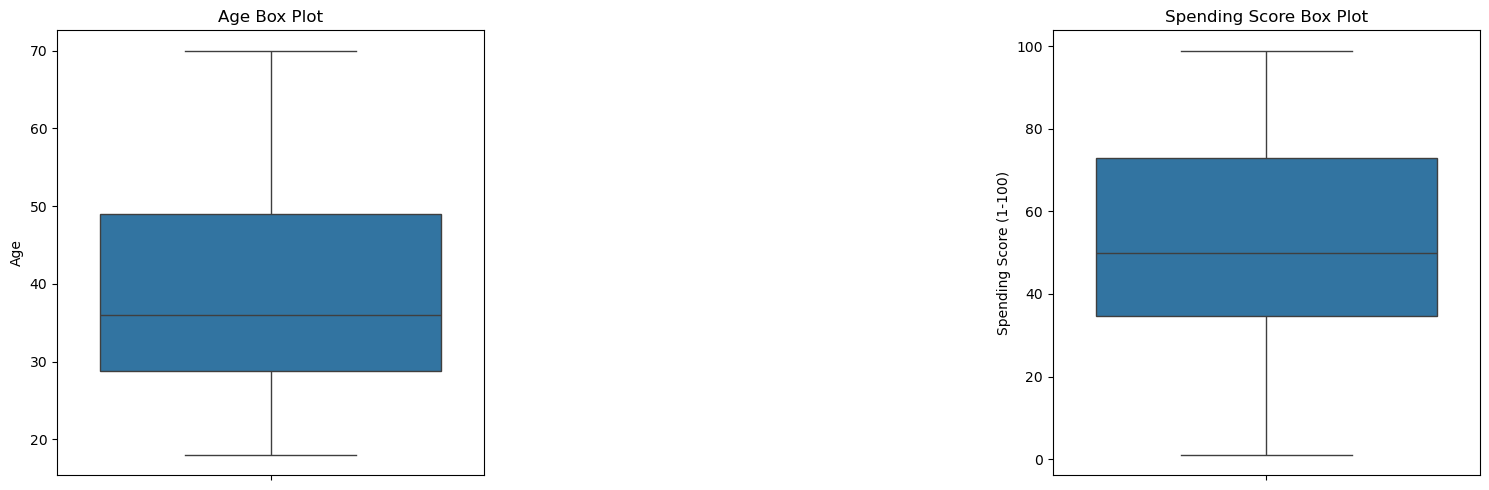

In [269]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.boxplot(df['Age'])
plt.title('Age Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(df['Spending Score (1-100)'])
plt.title('Spending Score Box Plot')

plt.tight_layout()
plt.show()

In [270]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
data_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)


C:\Users\dugga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dugga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dugga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dugga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

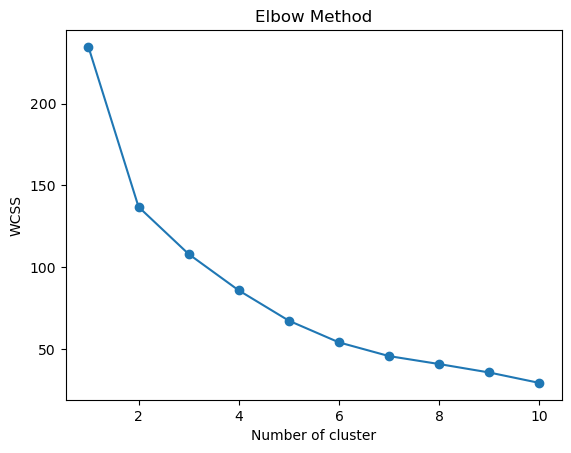

In [271]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)

# plotting the elbow method
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [308]:
optimal_clusters= 9
kmeans= KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster']= kmeans.fit_predict(data_scaled_df)

C:\Users\dugga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [310]:
# silhouette score
silhouette_avg = silhouette_score(data_scaled_df, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4296383370121589


         Age  Spending Score (1-100)  Gender_Encoded
0  64.153846               50.384615   -2.220446e-16
1  29.787879               81.727273    1.000000e+00
2  43.500000               22.642857    1.000000e+00
3  28.763158               73.342105    0.000000e+00
4  26.000000               47.956522    1.000000e+00
5  26.846154               13.000000    7.692308e-02
6  53.629630               49.296296    1.000000e+00
7  45.944444               33.277778   -2.220446e-16
8  60.000000                9.285714    0.000000e+00


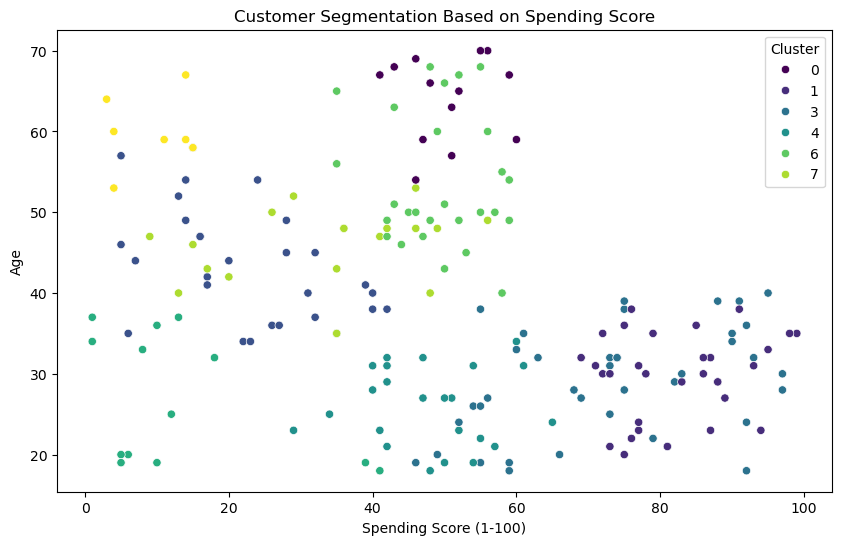

In [312]:
# Analyzing the characteristics of each cluster
cluster_centers= pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
print(cluster_centers)

# visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Spending Score (1-100)'], y=df['Age'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation Based on Spending Score')
plt.show()